In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mn
from sklearn import preprocessing 

In [3]:
train_d = drive.CreateFile({'id':'12UmjkxvaYAp4_7og19z1HqwAoUN-XhYp'})
train_d.GetContentFile('train.tsv')

train = DataFrame.from_csv("train.tsv", sep="\t")
train.head(3)
#test_d = drive.CreateFile({'id':'1H1ErVzWJoLjM8Rwv2SPsGdCb8kgKjTIL'})
#test_d.GetContentFile('test.tsv')

#test = DataFrame.from_csv("test.tsv", sep="\t")

#test.head()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [4]:
train.shape


(1482535, 7)

In [0]:
train_feature1 = train[train["price"] > 2.0] 
train_feature = train_feature1[train_feature1.price <= 2000]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [0]:
from string import punctuation
from scipy.sparse import vstack, hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import Ridge

In [8]:
y = np.log1p(train['price'])
y.describe()

count    1.482535e+06
mean     2.979059e+00
std      7.492094e-01
min      0.000000e+00
25%      2.397895e+00
50%      2.890372e+00
75%      3.401197e+00
max      7.605890e+00
Name: price, dtype: float64

In [0]:
combined = train

**Punctuation**

In [10]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
    
punctuation_symbols

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

In [0]:
import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

In [0]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [14]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def to_lower(x):
    return x.lower()

**Explore**

In [16]:
train.count()

name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

In [17]:
train.dtypes

name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [18]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [19]:
# Could we use these as features? Look at median price for each quantile
bins = [0, 10, 17, 29, 2009]
labels = ['q1','q2','q3','q4']
train['price_bin'] = pd.cut(train['price'], bins=bins, labels=labels)
train.groupby('price_bin')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_bin,,,,,,,,
q1,375615.0,7.715192,2.077888,3.0,6.0,8.0,10.0,10.0
q2,378177.0,13.842940,1.794584,10.5,12.0,14.0,15.0,17.0
q3,359743.0,22.555694,3.337832,17.5,20.0,22.0,25.0,29.0
q4,368126.0,63.543534,63.749703,29.5,35.0,45.0,66.0,2009.0


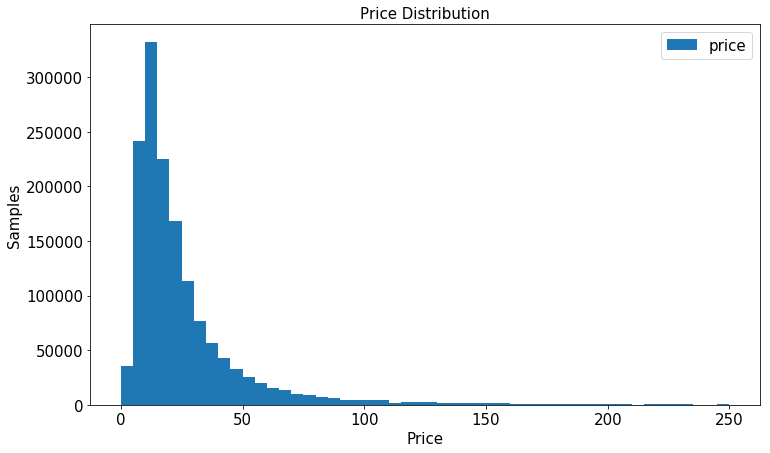

In [0]:
plt.figure(figsize=(12, 7))
plt.hist(train['price'], bins=50, range=[0,250], label='price')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


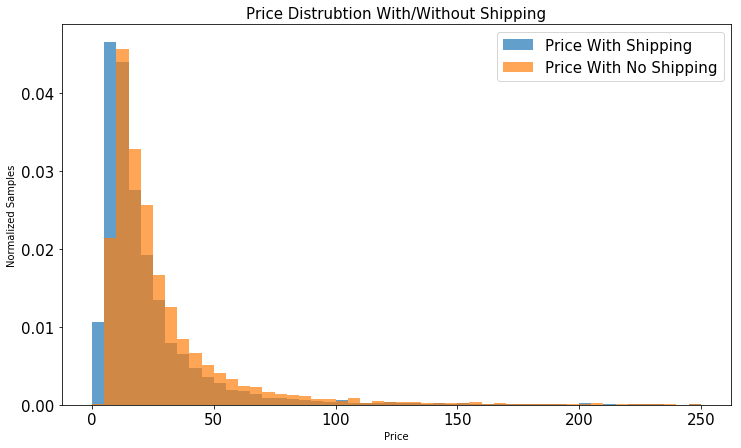

In [0]:
shipping = train[train['shipping']==1]['price']
no_shipping = train[train['shipping']==0]['price']

plt.figure(figsize=(12,7))
plt.hist(shipping, bins=50, normed=True, range=[0,250], alpha=0.7, label='Price With Shipping')
plt.hist(no_shipping, bins=50, normed=True, range=[0,250], alpha=0.7, label='Price With No Shipping')
plt.title('Price Distrubtion With/Without Shipping', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Normalized Samples')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [0]:
train['brand_name'].nunique()

4809

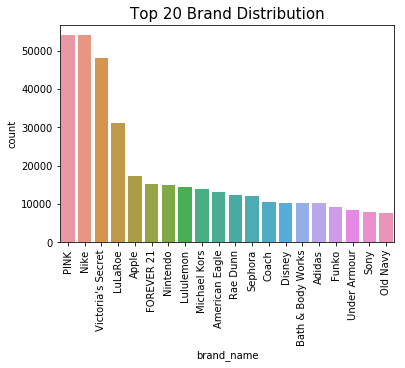

In [0]:
b20 = train['brand_name'].value_counts()[0:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=b20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

In [0]:
top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending = False)['price'][0:20].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()# Displayd frequency ratio of brand names
train['brand_name'].value_counts(1)

**Category**

In [0]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

cat_train = train[['category_main','category_sub1','category_sub2', 'price']]

cat_train.head()



,category_main,category_sub1,category_sub2,price
train_id,,,,
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


In [0]:
train.groupby('category_main')['price'].describe()

In [0]:
train['category_main'].value_counts(1)

Women                     0.451404
Beauty                    0.141205
Kids                      0.116651
Electronics               0.081281
Men                       0.063434
Home                      0.046114
Vintage & Collectibles    0.031614
Other                     0.030813
Handmade                  0.020954
Sports & Outdoors         0.016531
Name: category_main, dtype: float64

In [0]:
plt.figure(figsize=(17,10))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Categories', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items in Main Category', fontsize = 20)
plt.show()

In [0]:
fig, axes = plt.subplots(figsize=(12, 7))
main = cat_train[cat_train["price"]<100]
# Use a color palette
ax = sns.boxplot( x=main["category_main"], y=main["price"], palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=12)




In [0]:
train['no_brand'] = train['brand_name'].isnull()
train.no_brand

In [0]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='category_main', hue='no_brand', data=train).set_title('Category Distribution With/Without Brand');
plt.show()

In [0]:
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df['category_sub2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 2nd Category (Mean Price)', fontsize=20)
plt.show()

In [0]:
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False)[0:20]

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='b')
plt.yticks(range(0,len(df)), df['category_sub1'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 1', fontsize=15)
plt.title('Top 20 1st Category (Mean Price)', fontsize=20)
plt.show()

**Item Description**

In [0]:
combined["item_description"] = combined["item_description"].astype("str")
descr = combined[['item_description', 'price']]
descr["item_description"] = descr["item_description"].astype("str")
descr['count'] = descr['item_description'].apply(lambda x : len(str(x)))


descr['item_description'] = descr['item_description'].apply(remove_digits)
descr['item_description'] = descr['item_description'].apply(remove_punctuation)
descr['item_description'] = descr['item_description'].apply(remove_stop_words)
descr.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,item_description,price,count
train_id,,,
0,description yet,10.0,18
1,keyboard great condition works like came box p...,52.0,188
2,adorable top hint lace key hole back pale pink...,10.0,124


In [0]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

descr['item_description'] = descr['item_description'].apply(porter.stem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
def handle_missing_values(df):
    df['category_name'].fillna(value='missing', inplace=True)
    df['brand_name'].fillna(value='None', inplace=True)
    df['item_description'].fillna(value='None', inplace=True)



In [0]:
def to_categorical(df):
    df['brand_name'] = df['brand_name'].astype('category')
    df['category_name'] = df['category_name'].astype('category')
    df['item_condition_id'] = df['item_condition_id'].astype('category')

In [0]:
# Applying the pre-processing functions
handle_missing_values(combined)
to_categorical(combined)

In [0]:
#combined.item_description = combined.item_description.astype(str)

combined.item_description = combined.item_description.astype(str)

combined['item_description'] = combined['item_description'].apply(remove_digits)
combined['item_description'] = combined['item_description'].apply(remove_punctuation)
combined['item_description'] = combined['item_description'].apply(remove_stop_words)
combined['item_description'] = combined['item_description'].apply(to_lower)

combined['name'] = combined['name'].apply(remove_digits)
combined['name'] = combined['name'].apply(remove_punctuation)
combined['name'] = combined['name'].apply(remove_stop_words)
combined['name'] = combined['name'].apply(to_lower)

In [0]:
combined.isnull().any()

name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
price_bin             True
category_main         True
category_sub1         True
category_sub2         True
no_brand             False
dtype: bool

In [0]:
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(combined['name'])
X_name

<1482535x16961 sparse matrix of type '<class 'numpy.int64'>'
	with 5527212 stored elements in Compressed Sparse Row format>

In [0]:
combined["category_name"] = combined["category_name"].astype("str")

In [0]:
cv = CountVectorizer()
X_category = cv.fit_transform(combined['category_name'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_category

<1482535x1012 sparse matrix of type '<class 'numpy.int64'>'
	with 5936121 stored elements in Compressed Sparse Row format>

In [0]:
# Apply TFIDF to "item_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(combined['item_description'])

In [0]:
# Apply LabelBinarizer to "brand_name"
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(combined['brand_name'])

In [0]:
combined["shipping"] = combined["shipping"].astype('category')

In [0]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(sparse_merge, y, test_size = 0.25)

In [0]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [0]:
# X_train_sparse = sparse_merge[:train_size]

# X_test = sparse_merge[train_size:]

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
X = sparse_merge
kf.get_n_splits(X)
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [0]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 148254  148255  148256 ... 1482532 1482533 1482534] TEST: [     0      1      2 ... 148251 148252 148253]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [148254 148255 148256 ... 296505 296506 296507]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [296508 296509 296510 ... 444759 444760 444761]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [444762 444763 444764 ... 593013 593014 593015]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [593016 593017 593018 ... 741267 741268 741269]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [741270 741271 741272 ... 889520 889521 889522]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [ 889523  889524  889525 ... 1037773 1037774 1037775]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [1037776 1037777 1037778 ... 1186026 1186027 1186028]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

In [0]:
lgbm_pred=clf.predict(X_test)

In [0]:
np.expm1(lgbm_pred)

array([12.95213556, 28.8899121 , 15.84290487, ..., 16.1327958 ,
       10.95704257, 17.68707684])

In [0]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_pred))))



[3.814697265625e-05] LGBM completed.
LGBM rmsle: 0.5389605996939181


In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("r-squared:"+str(r2_score(y_test, lgbm_pred)))
print("mean absolute error:"+str(mean_absolute_error(y_test, lgbm_pred)))      

r-squared:0.48083327632274453
mean absolute error:0.4098796060227692


In [0]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_test)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(preds_valid))))

Fitting Ridge Model
[231.8337676525116] Ridge completed.
Ridge rmsle: 0.4714119252923613


In [0]:
from sklearn.metrics import r2_score
print("r-squared:"+str(r2_score(y_test, preds_valid)))
print("mean absolute error:"+str(mean_absolute_error(y_test, preds_valid)))

r-squared:0.6028139905134817
mean absolute error:0.3519239701167378


**TRY**

In [0]:
data = train

In [21]:
import nltk
from nltk import word_tokenize
nltk.download("stopwords")
nltk.download("punkt")

stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

#descr['item_description'] = descr['item_description'].apply(porter.stem)

In [0]:
item_words = []
sentence_final = []
for sentence in data.item_description:
    temp=""
    item_words = word_tokenize(sentence)
    item_filtered_sentence = ""
    for word in item_words:
        if word not in stopwords and word.isalpha():
          temp = temp + " " + (porter.stem(word))
    sentence_final.append(temp);

In [0]:
data["porter"] = sentence_final

In [0]:
data['porter'] = data['porter'].apply(remove_digits)
data['porter'] = data['porter'].apply(remove_punctuation)
data['porter'] = data['porter'].apply(to_lower)


In [0]:
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(data['name'])
X_name

<1482535x16961 sparse matrix of type '<class 'numpy.int64'>'
	with 5527212 stored elements in Compressed Sparse Row format>

In [0]:
cv = CountVectorizer()
X_category = cv.fit_transform(data['category_name'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_category

<1482535x1012 sparse matrix of type '<class 'numpy.int64'>'
	with 5936121 stored elements in Compressed Sparse Row format>

In [0]:
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(data['porter'])

In [0]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(data['brand_name'])

In [0]:
data["shipping"] = data["shipping"].astype('category')

In [0]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(data[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [0]:
# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test = train_test_split(sparse_merge, y, test_size = 0.25)

In [0]:
# X_train_sparse = sparse_merge[:train_size]

# X_test = sparse_merge[train_size:]

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
X = sparse_merge
kf.get_n_splits(X)
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [0]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 148254  148255  148256 ... 1482532 1482533 1482534] TEST: [     0      1      2 ... 148251 148252 148253]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [148254 148255 148256 ... 296505 296506 296507]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [296508 296509 296510 ... 444759 444760 444761]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [444762 444763 444764 ... 593013 593014 593015]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [593016 593017 593018 ... 741267 741268 741269]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [741270 741271 741272 ... 889520 889521 889522]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [ 889523  889524  889525 ... 1037773 1037774 1037775]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [1037776 1037777 1037778 ... 1186026 1186027 1186028]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

In [0]:
lgbm_pred=clf.predict(X_test)

In [0]:
np.expm1(lgbm_pred)

array([12.77632208, 28.19903342, 15.75148727, ..., 15.97729398,
       10.88583538, 18.21055593])

In [0]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_pred))))



[2.86102294921875e-05] LGBM completed.
LGBM rmsle: 0.5382789144523951


In [0]:
# from sklearn.metrics import r2_score
# r2_score(y_test, lgbm_pred)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("r-squared:"+str(r2_score(y_test, lgbm_pred)))
print("mean absolute error:"+str(mean_absolute_error(y_test, lgbm_pred)))      

r-squared:0.4821457450984957
mean absolute error:0.4092809699494612


In [0]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_test)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(preds_valid))))

Fitting Ridge Model
[225.23376488685608] Ridge completed.
Ridge rmsle: 0.4721081380831702


In [0]:
# from sklearn.metrics import r2_score
# r2_score(y_test, preds_valid)

from sklearn.metrics import r2_score
print("r-squared:"+str(r2_score(y_test, preds_valid)))
print("mean absolute error:"+str(mean_absolute_error(y_test, preds_valid)))

r-squared:0.6016399422497174
mean absolute error:0.35256166207360046


lancast stem

In [0]:
from nltk import LancasterStemmer

lancaster = LancasterStemmer()

In [0]:
item_words1 = []
sentence_final1 = []
for sentence1 in data.item_description:
    temp1=""
    item_words1 = word_tokenize(sentence1)
    item_filtered_sentence1 = ""
    for word1 in item_words1:
        if word1 not in stopwords and word.isalpha():
            temp1 = temp1 + " " + (lancaster.stem(word1))
    sentence_final1.append(temp1);

In [0]:
data["lancaster"] = sentence_final1

In [0]:
data['lancaster'] = data['lancaster'].apply(remove_digits)
data['lancaster'] = data['lancaster'].apply(remove_punctuation)
data['lancaster'] = data['lancaster'].apply(to_lower)


In [0]:
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(data['name'])
X_name

<1482535x16961 sparse matrix of type '<class 'numpy.int64'>'
	with 5527212 stored elements in Compressed Sparse Row format>

In [0]:
cv = CountVectorizer()
X_category = cv.fit_transform(data['category_name'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_category

<1482535x1012 sparse matrix of type '<class 'numpy.int64'>'
	with 5936121 stored elements in Compressed Sparse Row format>

In [0]:
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(data['lancaster'])

In [0]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(data['brand_name'])

In [0]:
data["shipping"] = data["shipping"].astype('category')

In [0]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(data[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [0]:
# from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
X = sparse_merge
kf.get_n_splits(X)
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [0]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 148254  148255  148256 ... 1482532 1482533 1482534] TEST: [     0      1      2 ... 148251 148252 148253]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [148254 148255 148256 ... 296505 296506 296507]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [296508 296509 296510 ... 444759 444760 444761]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [444762 444763 444764 ... 593013 593014 593015]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [593016 593017 593018 ... 741267 741268 741269]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [741270 741271 741272 ... 889520 889521 889522]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [ 889523  889524  889525 ... 1037773 1037774 1037775]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [1037776 1037777 1037778 ... 1186026 1186027 1186028]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

In [0]:
lgbm_pred=clf.predict(X_test)

In [0]:
np.expm1(lgbm_pred)

array([13.00787875, 27.68239179, 15.89181424, ..., 15.90375885,
       10.84721216, 18.5812732 ])

In [0]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_pred))))



[4.100799560546875e-05] LGBM completed.
LGBM rmsle: 0.5384748664540546


In [0]:
# from sklearn.metrics import r2_score
# r2_score(y_test, lgbm_pred)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("r-squared:"+str(r2_score(y_test, lgbm_pred)))
print("mean absolute error:"+str(mean_absolute_error(y_test, lgbm_pred)))      

r-squared:0.48176864302294875
mean absolute error:0.409445650254516


In [0]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_test)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(preds_valid))))

Fitting Ridge Model
[238.4254331588745] Ridge completed.
Ridge rmsle: 0.47252620716404675


In [0]:
# from sklearn.metrics import r2_score
# r2_score(y_test, preds_valid)
from sklearn.metrics import r2_score
print("r-squared:"+str(r2_score(y_test, preds_valid)))
print("mean absolute error:"+str(mean_absolute_error(y_test, preds_valid)))

r-squared:0.6009341049666923
mean absolute error:0.3530291489095241


In [0]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# X = sparse_merge
# kf.get_n_splits(X)
# print(kf) 
# KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [0]:
# for train_index, test_index in kf.split(X):
#  print("TRAIN:", train_index, "TEST:", test_index)
#  X_train, X_test = X[train_index], X[test_index]
#  y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 148254  148255  148256 ... 1482532 1482533 1482534] TEST: [     0      1      2 ... 148251 148252 148253]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [148254 148255 148256 ... 296505 296506 296507]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [296508 296509 296510 ... 444759 444760 444761]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [444762 444763 444764 ... 593013 593014 593015]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [593016 593017 593018 ... 741267 741268 741269]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [741270 741271 741272 ... 889520 889521 889522]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [ 889523  889524  889525 ... 1037773 1037774 1037775]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [1037776 1037777 1037778 ... 1186026 1186027 1186028]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [

In [0]:
#d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
# params = {}
# #params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'regression'
# params['metric'] = 'rmse'

# clf = lgb.train(params, d_train, 100)

In [0]:
#lgbm_pred=clf.predict(X_test)

In [0]:
#np.expm1(lgbm_pred)

array([12.84414122, 26.06473209, 15.67159379, ..., 15.85447335,
       10.86830006, 18.18294014])

In [0]:
# import time
# start_time = time.time()
# print('[{}] LGBM completed.'.format(time.time() - start_time))
# print("LGBM rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_pred))))



[3.814697265625e-05] LGBM completed.
LGBM rmsle: 0.5386263899203864


In [0]:
# from sklearn.metrics import r2_score
# r2_score(y_test, lgbm_pred)
# from sklearn.metrics import mean_absolute_error
# print("mean absolute error:"+str(mean_absolute_error(y_test, lgbm_pred)))   

0.4814769478498768

In [0]:
# import time 

# start_time = time.time()

# model = Ridge(solver = "sag", fit_intercept=False)

# print("Fitting Ridge Model")
# model.fit(X_train, y_train)

# preds_valid = model.predict(X_test)

# print('[{}] Ridge completed.'.format(time.time() - start_time))
# print("Ridge rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(preds_valid))))

Fitting Ridge Model
[207.33034873008728] Ridge completed.
Ridge rmsle: 0.4716669311576959


In [0]:
# from sklearn.metrics import r2_score
# print("r-squared:"+str(r2_score(y_test, preds_valid)))
# from sklearn.metrics import mean_absolute_error
# print("mean absolute error:"+str(mean_absolute_error(y_test, preds_valid)))   

r-squared:0.6023841661873084
mean absolute error:0.3522818777775839


Lemmatizer

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
item_words2 = []
sentence_final2 = []
for sentence in data.item_description:
    temp2=""
    item_words2 = word_tokenize(sentence)
    item_filtered_sentence2 = ""
    for word in item_words2:
        if word not in stopwords and word.isalpha():
            temp2 = temp2 + " " + (lemmatizer.lemmatize(word))
    sentence_final2.append(temp2);
    

In [0]:
data["lemmatize"] = sentence_final2

In [0]:
data['lemmatize'] = data['lemmatize'].apply(remove_digits)
data['lemmatize'] = data['lemmatize'].apply(remove_punctuation)
data['lemmatize'] = data['lemmatize'].apply(to_lower)


In [0]:
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(data['name'])
X_name

<1482535x16961 sparse matrix of type '<class 'numpy.int64'>'
	with 5527212 stored elements in Compressed Sparse Row format>

In [0]:
cv = CountVectorizer()
X_category = cv.fit_transform(data['category_name'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_category

<1482535x1012 sparse matrix of type '<class 'numpy.int64'>'
	with 5936121 stored elements in Compressed Sparse Row format>

In [0]:
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(data['lemmatize'])

In [0]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(data['brand_name'])

In [0]:
data["shipping"] = data["shipping"].astype('category')

In [0]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
X = sparse_merge
kf.get_n_splits(X)
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [0]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 148254  148255  148256 ... 1482532 1482533 1482534] TEST: [     0      1      2 ... 148251 148252 148253]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [148254 148255 148256 ... 296505 296506 296507]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [296508 296509 296510 ... 444759 444760 444761]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [444762 444763 444764 ... 593013 593014 593015]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [593016 593017 593018 ... 741267 741268 741269]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [741270 741271 741272 ... 889520 889521 889522]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [ 889523  889524  889525 ... 1037773 1037774 1037775]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [1037776 1037777 1037778 ... 1186026 1186027 1186028]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [

In [0]:
d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

In [0]:
lgbm_pred=clf.predict(X_test)

In [0]:
np.expm1(lgbm_pred)

array([12.87266012, 27.96883998, 15.74803937, ..., 15.91787709,
       10.95416584, 18.18870064])

In [0]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_pred))))




[4.00543212890625e-05] LGBM completed.
LGBM rmsle: 0.5387163024306395


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, lgbm_pred)
print("r-squared:"+str(r2_score(y_test, lgbm_pred)))
print("mean absolute error:"+str(mean_absolute_error(y_test, lgbm_pred)))

r-squared:0.4813038200515414
mean absolute error:0.4097556614229984


In [0]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_test)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(preds_valid))))

Fitting Ridge Model
[238.61450815200806] Ridge completed.
Ridge rmsle: 0.47166832560041894


In [0]:
from sklearn.metrics import r2_score
print("r-squared:"+str(r2_score(y_test, preds_valid)))
from sklearn.metrics import mean_absolute_error
print("mean absolute error:"+str(mean_absolute_error(y_test, preds_valid)))      

r-squared:0.6023818151497885
mean absolute error:0.35228287710761497


club

In [0]:
data["name"] = data["name"].astype("str")
data["brand_name"] = data["brand_name"].astype("str")
data["category_name"] = data["category_name"].astype("str")
data["item_description"] = data["item_description"].astype("str")

In [0]:
data["new"] = data["name"]+ " "+data["brand_name"]+" "+data["category_name"]+" "+data["item_description"]

In [0]:
item_words4 = []
sentence_final4 = []
for sentence in data.new:
    temp4=""
    item_words4 = word_tokenize(sentence)
    item_filtered_sentence4 = ""
    for word in item_words4:
        if word not in stopwords and word.isalpha():
            #temp_sent = temp_sent + " " + (my_lemmatizer.lemmatize(word))
            temp4 = temp4 + " " + (lemmatizer.lemmatize(word))
    sentence_final4.append(temp4);
    

In [0]:
data["club"] = sentence_final4

In [0]:
data['club'] = data['club'].apply(remove_digits)
data['club'] = data['club'].apply(remove_punctuation)
data['club'] = data['club'].apply(to_lower)


In [0]:
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(data['club'])

In [0]:
data["shipping"] = data["shipping"].astype('category')

In [0]:
data["item_condition_id"] = data["item_condition_id"].astype("category")

In [0]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(data[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description)).tocsr()

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
X = sparse_merge
kf.get_n_splits(X)
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [0]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 148254  148255  148256 ... 1482532 1482533 1482534] TEST: [     0      1      2 ... 148251 148252 148253]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [148254 148255 148256 ... 296505 296506 296507]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [296508 296509 296510 ... 444759 444760 444761]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [444762 444763 444764 ... 593013 593014 593015]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [593016 593017 593018 ... 741267 741268 741269]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [741270 741271 741272 ... 889520 889521 889522]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [ 889523  889524  889525 ... 1037773 1037774 1037775]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [1037776 1037777 1037778 ... 1186026 1186027 1186028]
TRAIN: [      0       1       2 ... 1482532 1482533 1482534] TEST: [

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)


In [0]:
params = {}
#params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

In [0]:
lgbm_pred=clf.predict(X_test)

In [0]:
np.expm1(lgbm_pred)

array([13.95051834, 20.7773767 , 16.09137933, ..., 15.9186744 ,
       12.04984043, 19.66873296])

In [0]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_pred))))




[4.458427429199219e-05] LGBM completed.
LGBM rmsle: 0.5583794978033335


In [0]:
from sklearn.metrics import r2_score
print("r-squared:"+str(r2_score(y_test, lgbm_pred)))
from sklearn.metrics import mean_absolute_error
print("mean absolute error:"+str(mean_absolute_error(y_test, lgbm_pred)))   

r-squared:0.44274786546485967
mean absolute error:0.426481174749929


In [0]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_test)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(preds_valid))))

Fitting Ridge Model
[80.17570638656616] Ridge completed.
Ridge rmsle: 0.4845469019879797


In [0]:
from sklearn.metrics import r2_score
print("r-squared:"+str(r2_score(y_test, preds_valid)))
from sklearn.metrics import mean_absolute_error
print("mean absolute error:"+str(mean_absolute_error(y_test, preds_valid)))   

r-squared:0.5803720034574444
mean absolute error:0.3617400290698352
